Text(0, 0.5, 'y')

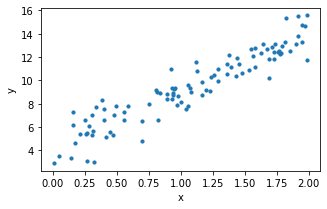

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1차원 입력, 1차원 출력
x = 2 * np.random.rand(100, 1)
y = 4 + 5*x + np.random.randn(100,1)

plt.figure(figsize = (5,3))
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

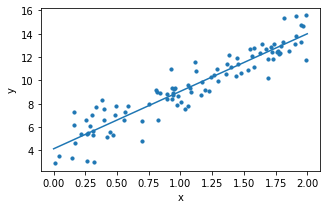

In [2]:
# analytic, normal equation
X = np.hstack([np.ones((100,1)), x])
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

x_new = np.linspace(0,2,10).reshape(-1,1)
X_new = np.hstack([np.ones((10,1)), x_new])
y_predict = X_new.dot(theta)

plt.figure(figsize = (5,3))
plt.scatter(x,y, s=10)
plt.plot(x_new,y_predict)
plt.xlabel('x')
plt.ylabel('y')

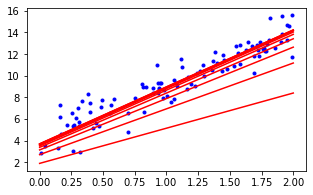

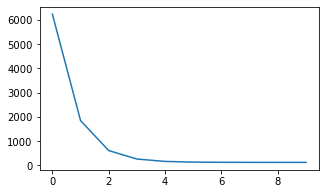

In [3]:
# theta를 랜덤으로 초기화, bias를 포함 => theta는 2차원
# y = theta_0 + theta_1 * x
theta = np.random.randn(2,1)

# learning rate
eta = 0.001
m,d = X.shape

maxIter = 10

cost = np.empty([maxIter,1]) # 100x1 비어있는 행렬
cost[:] = np.nan # Not a Number

plt.figure(figsize = (5,3))
plt.plot(x, y, "b.")

# 매번 갱신되는 theta를 저장해놓기 위한 행렬
theta_iter = np.zeros((2,maxIter))
for iter in range(0,maxIter):
    y_predict = X.dot(theta)
    cost[iter] = np.sum((y_predict - y)**2) # SSE

    # batch gradient descent
    theta = theta - eta*(2*X.T.dot(y_predict - y))
    theta_iter[:,iter] = theta.reshape(2)
    
    # 갱신된 theta를 이용해서, 전체 영역에서의 prediction을 구해서, 선으로 plot
    y_new = X_new.dot(theta)
    plt.plot(x_new,y_new, "r-")    


plt.figure(figsize = (5,3))
plt.plot(cost)